<a href="https://colab.research.google.com/github/chinmay29hub/stock-market-analysis-using-deep-learning/blob/main/ann_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.4.1'

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
X_train=dataset_train.iloc[:-1,1:2].values  #creating a numarray that contains the open price of the stock
y_train=dataset_train.iloc[1:,1:2].values
X_test=dataset_test.iloc[:-1,1:2].values  #creating a numarray that contains the open price of the stock
y_test=dataset_test.iloc[1:,1:2].values

we are trying to predict the opening price using the previous days opening stock price


In [ ]:
print(y_test)

[[788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [ ]:
print(X_test)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]]


## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()#used to create a sequnece of layers


### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the ANN model on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
40/40 [==============================] - 1s 955us/step - loss: 300666.1082
Epoch 2/100
40/40 [==============================] - 0s 882us/step - loss: 287348.0816
Epoch 3/100
40/40 [==============================] - 0s 835us/step - loss: 268360.5846
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 241714.8773
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 211685.1528
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 177961.1761
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 140823.7668
Epoch 8/100
40/40 [==============================] - 0s 979us/step - loss: 106800.0133
Epoch 9/100
40/40 [==============================] - 0s 954us/step - loss: 73618.4484
Epoch 10/100
40/40 [==============================] - 0s 942us/step - loss: 46267.6933
Epoch 11/100
40/40 [==============================] - 0s 1ms/step - loss: 27152.4443
Epoch 12/100
40/40 [==============================] - 

### Predicting the results of the Test set

In [ ]:
y_pred = ann.predict(X_test)
# np.set_printoptions(precision=2)#set the decimal place to 2
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))#reshaping horizontal to vertical vector
print(y_pred)
print(y_test)
print(y_pred-y_test)

[[778.235  ]
 [787.7577 ]
 [785.4842 ]
 [794.63806]
 [805.7462 ]
 [807.202  ]
 [804.3502 ]
 [806.4842 ]
 [806.8232 ]
 [806.4243 ]
 [805.15796]
 [804.4699 ]
 [806.2548 ]
 [806.59375]
 [821.6008 ]
 [828.8999 ]
 [837.0665 ]
 [833.97546]
 [813.98267]]
[[788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]
[[-10.12501465]
 [  1.67769043]
 [ -9.77580811]
 [-11.76193848]
 [ -2.11378418]
 [  2.20202637]
 [ -2.78978027]
 [ -0.99580811]
 [ -0.25681885]
 [  0.61431641]
 [  0.03795898]
 [ -2.44009033]
 [ -0.99517822]
 [-15.70625   ]
 [ -8.01916992]
 [ -8.91009766]
 [  2.35652832]
 [ 19.31546387]
 [ 17.12266602]]


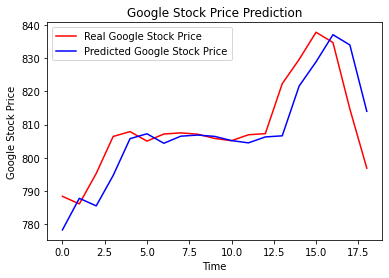

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


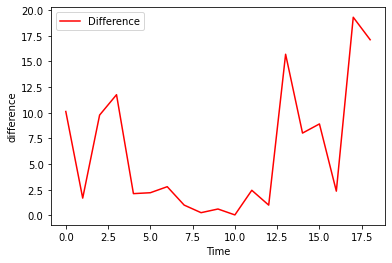

In [ ]:
plt.plot(abs(y_pred-y_test), color = 'red', label = 'Difference')
plt.xlabel('Time')
plt.ylabel('difference')
plt.legend()
plt.show()

In [ ]:
# dataset_test_1=pd.read_csv('WIPRO.NS.csv')
# X_test_1=dataset_test_1.iloc[:-1,1:2].values  #creating a numarray that contains the open price of the stock
# y_test_1=dataset_test_1.iloc[1:,1:2].values
# y_pred_1 = ann.predict(X_test_1)
# # np.set_printoptions(precision=2)#set the decimal place to 2
# # print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))#reshaping horizontal to vertical vector

# plt.plot(y_test_1[:15], color = 'red', label = 'Real Wipro Stock Price')
# plt.plot(y_pred_1[:15], color = 'blue', label = 'Predicted Wipro Stock Price')
# plt.title('Google Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Google Stock Price')
# plt.legend()
# plt.show()